In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Data Exploration

In [ ]:
df.dtypes

,0
Country,object
Age,float64
Salary,float64
Purchased,object


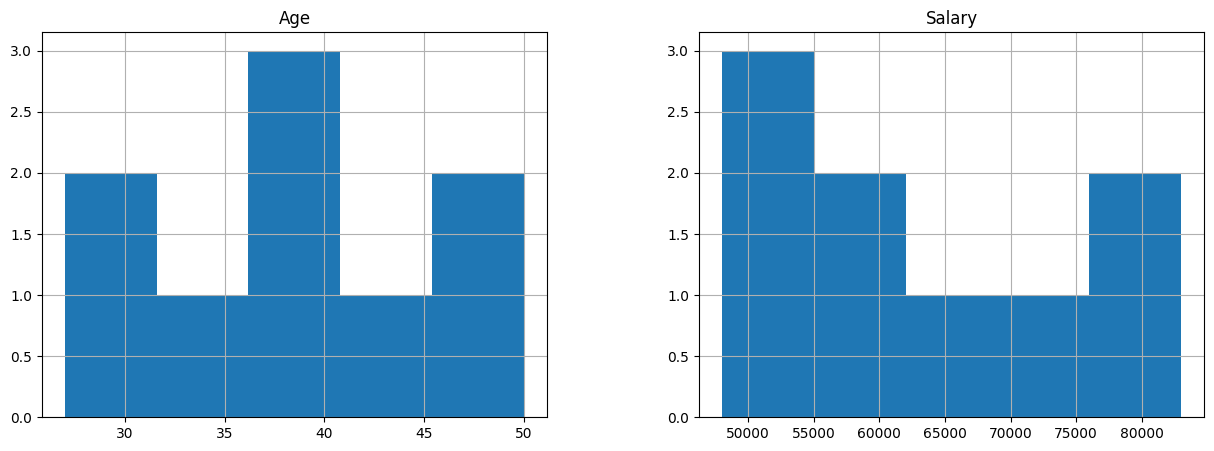

In [ ]:
#histogram
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
df.hist(column='Age', ax=ax[0], bins=5)
df.hist(column='Salary', ax=ax[1], bins=5)
plt.show()

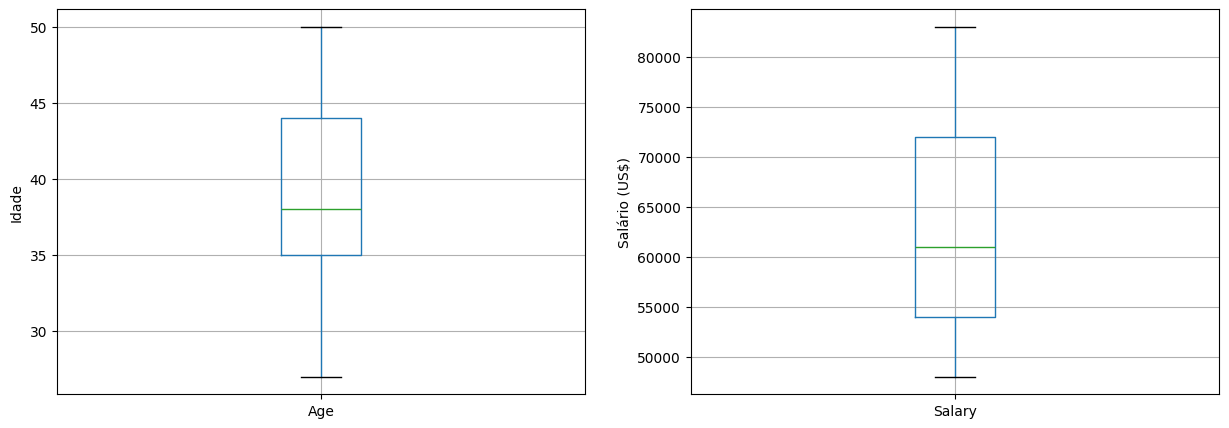

In [ ]:
#boxplot
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
df.boxplot(column='Age', ax=ax[0])
ax[0].set_ylabel('Idade')
df.boxplot(column='Salary', ax=ax[1])
ax[1].set_ylabel('Salário (US$)')
plt.show()

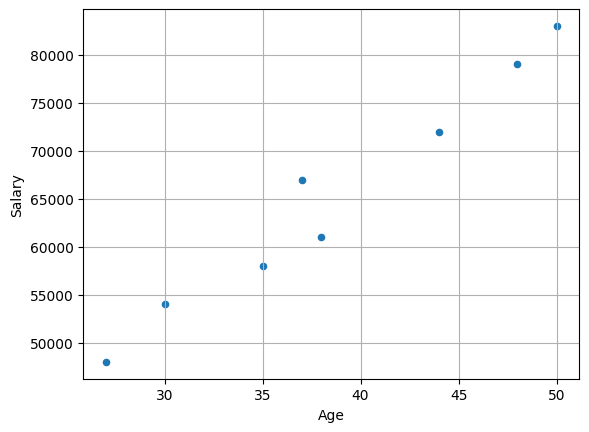

In [ ]:
# scatter plot
## identify linear relation between variables
df.plot.scatter(x='Age', y='Salary', grid='on')
plt.show()

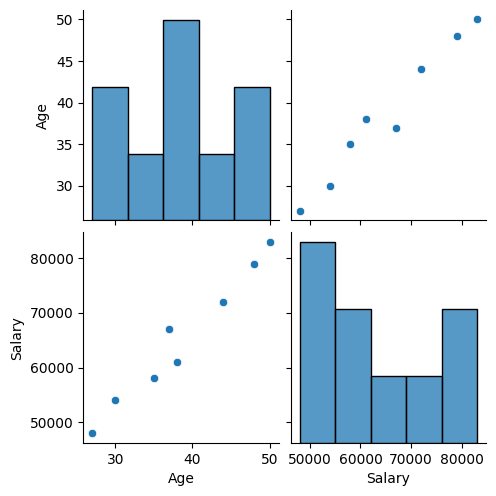

In [ ]:
# seaborn for automatic and multiple visualizations
sns.pairplot(data=df[['Age', 'Salary']], diag_kind='hist')

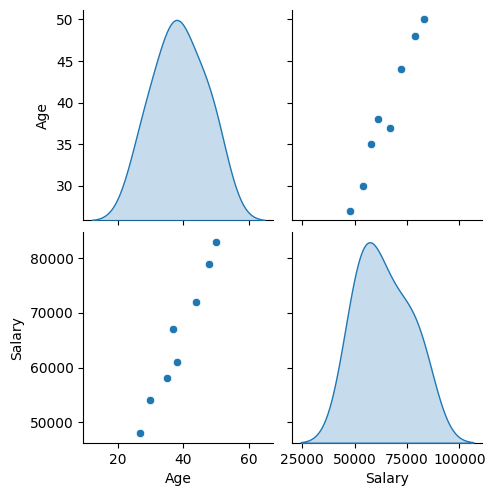

In [ ]:
# seaborn for automatic and multiple visualizations
sns.pairplot(data=df[['Age', 'Salary']], diag_kind='kde')
# for estimate the problably relation

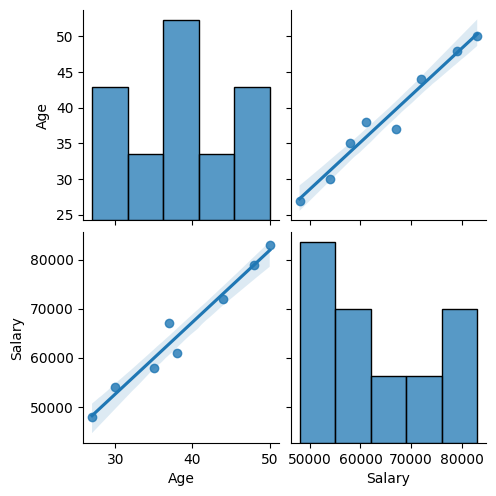

In [ ]:
# seaborn for automatic and multiple visualizations
sns.pairplot(data=df[['Age', 'Salary']], kind='reg')
#estimate the regression

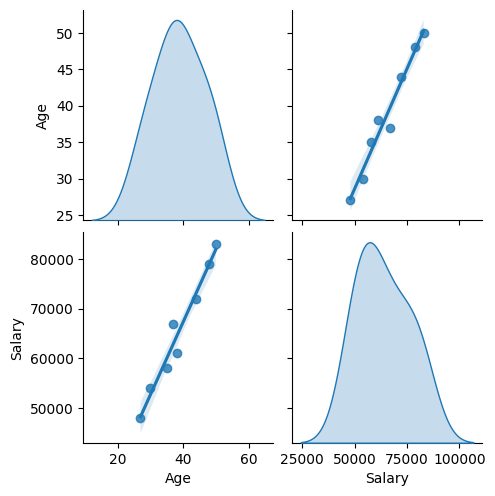

In [ ]:
# seaborn for automatic and multiple visualizations
sns.pairplot(data=df[['Age', 'Salary']], kind='reg', diag_kind='kde')
# combine

### Data Processing

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# for study methods
SimpleImputer?

In [ ]:
# numpy print
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# change Nan data for mean of column
imputer = SimpleImputer(strategy='mean')
num_cols_mean = imputer.fit_transform(df[['Age', 'Salary']])
num_cols_mean

array([[   44.    , 72000.    ],
       [   27.    , 48000.    ],
       [   30.    , 54000.    ],
       [   38.    , 61000.    ],
       [   40.    , 63777.7778],
       [   35.    , 58000.    ],
       [   38.7778, 52000.    ],
       [   48.    , 79000.    ],
       [   50.    , 83000.    ],
       [   37.    , 67000.    ]])

In [ ]:
# change Nan data for median of column
imputer = SimpleImputer(strategy='median')
num_cols_median = imputer.fit_transform(df[['Age', 'Salary']])
num_cols_median

array([[   44., 72000.],
       [   27., 48000.],
       [   30., 54000.],
       [   38., 61000.],
       [   40., 61000.],
       [   35., 58000.],
       [   38., 52000.],
       [   48., 79000.],
       [   50., 83000.],
       [   37., 67000.]])

In [ ]:
# substitute in dataframe
df[['Age', 'Salary']] = num_cols_median
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Processing of numerical data



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
StandardScaler?
# StandardScaler = z score normalization

In [ ]:
MinMaxScaler?
# MinMaxScaler = normalization based in range

In [ ]:
sc = StandardScaler()
num_cols_std = sc.fit_transform(df[['Age', 'Salary']])
num_cols_std

array([[ 0.7697,  0.7726],
       [-1.6992, -1.4088],
       [-1.2635, -0.8635],
       [-0.1017, -0.2272],
       [ 0.1888, -0.2272],
       [-0.5374, -0.4999],
       [-0.1017, -1.0452],
       [ 1.3507,  1.4088],
       [ 1.6411,  1.7724],
       [-0.2469,  0.3181]])

In [ ]:
minmax = MinMaxScaler(feature_range=(0,1))
num_cols_minmax = minmax.fit_transform(df[['Age', 'Salary']])
num_cols_minmax

array([[0.7391, 0.6857],
       [0.    , 0.    ],
       [0.1304, 0.1714],
       [0.4783, 0.3714],
       [0.5652, 0.3714],
       [0.3478, 0.2857],
       [0.4783, 0.1143],
       [0.913 , 0.8857],
       [1.    , 1.    ],
       [0.4348, 0.5429]])

In [ ]:
# substitute in dataframe
df[['Age', 'Salary']] = num_cols_std
df

,Country,Age,Salary,Purchased
0,France,0.769734,0.772568,No
1,Spain,-1.699225,-1.408800,Yes
2,Germany,-1.263526,-0.863458,No
3,Spain,-0.101663,-0.227226,No
4,Germany,0.188803,-0.227226,Yes
5,France,-0.537362,-0.499897,Yes
6,Spain,-0.101663,-1.045239,No
7,France,1.350666,1.408800,Yes
8,Germany,1.641132,1.772361,No
9,France,-0.246896,0.318116,Yes



### Categorical data processing

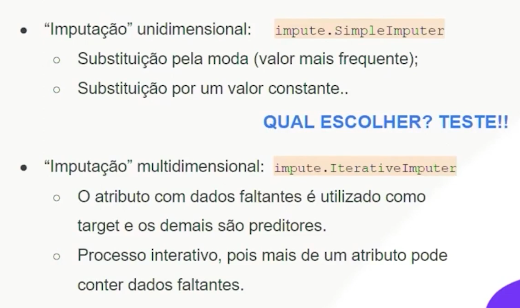

### Data Exploration

<Axes: title={'center': 'Clientes por País'}, xlabel='Country'>

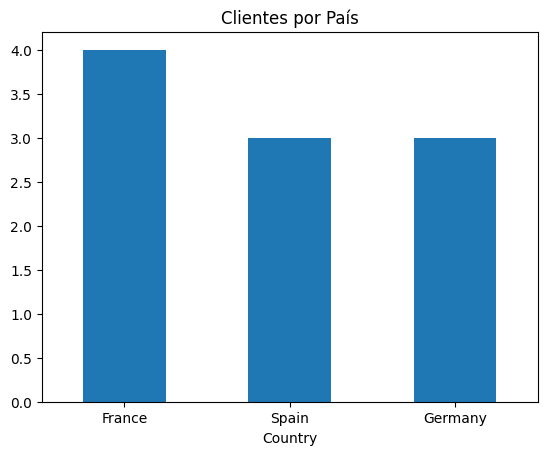

In [33]:
# plot bar
df['Country'].value_counts().plot.bar(rot=0,
                                      title='Clientes por País')

<Axes: title={'center': 'Comprou (Sim/Nao)'}, xlabel='Purchased'>

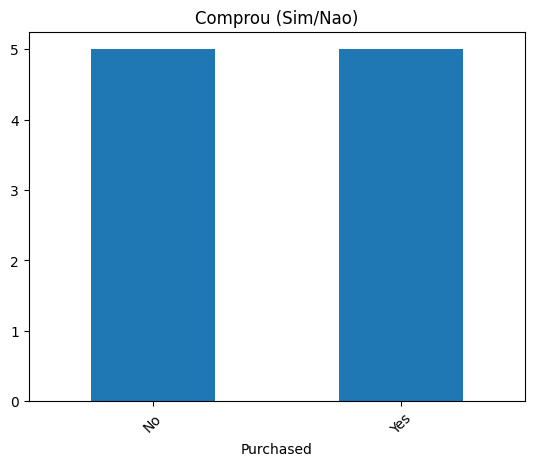

In [34]:
df['Purchased'].value_counts().plot.bar(rot=45,
                                        title='Comprou (Sim/Nao)')

<Axes: ylabel='count'>

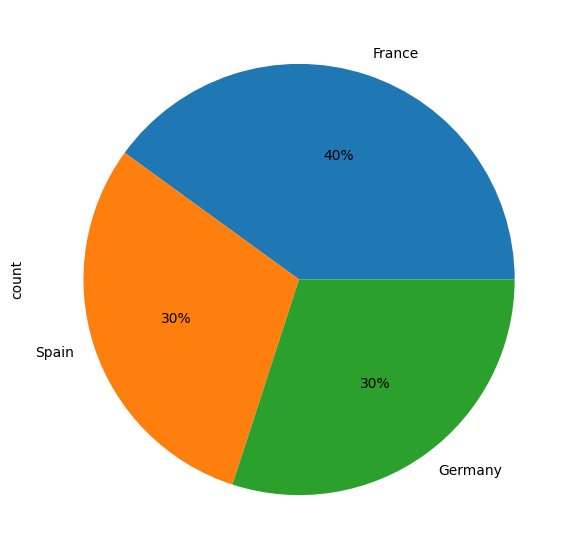

In [39]:
# pie plot
df['Country'].value_counts().plot.pie(autopct='%.0f%%',
                                      figsize=(7,7))

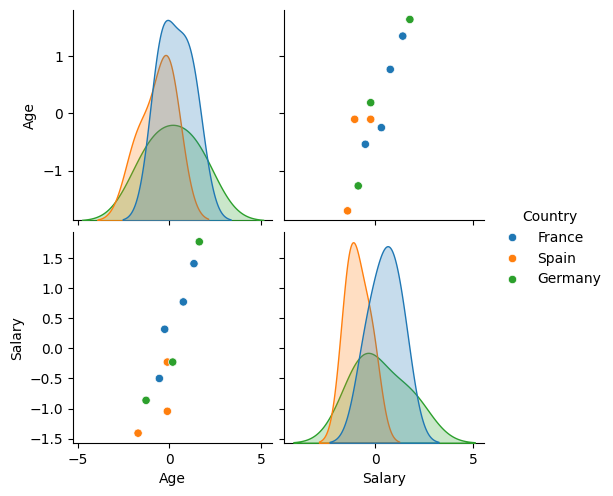

In [40]:
sns.pairplot(data=df, hue='Country')

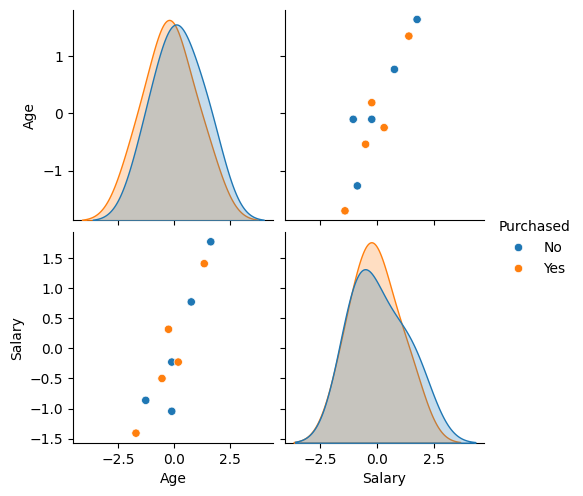

In [41]:
sns.pairplot(data=df, hue='Purchased')

### Data Processing

In [43]:
# emulating null data
df.iloc[1,0] = np.nan
df

,Country,Age,Salary,Purchased
0,France,0.769734,0.772568,No
1,NaN,-1.699225,-1.408800,Yes
2,Germany,-1.263526,-0.863458,No
3,Spain,-0.101663,-0.227226,No
4,Germany,0.188803,-0.227226,Yes
5,France,-0.537362,-0.499897,Yes
6,Spain,-0.101663,-1.045239,No
7,France,1.350666,1.408800,Yes
8,Germany,1.641132,1.772361,No
9,France,-0.246896,0.318116,Yes


In [47]:
# changing NaN data for the most frequent
imputer = SimpleImputer(strategy='most_frequent')
df['Country'] = imputer.fit_transform(df[['Country']]).ravel()
df

,Country,Age,Salary,Purchased
0,France,0.769734,0.772568,No
1,France,-1.699225,-1.408800,Yes
2,Germany,-1.263526,-0.863458,No
3,Spain,-0.101663,-0.227226,No
4,Germany,0.188803,-0.227226,Yes
5,France,-0.537362,-0.499897,Yes
6,Spain,-0.101663,-1.045239,No
7,France,1.350666,1.408800,Yes
8,Germany,1.641132,1.772361,No
9,France,-0.246896,0.318116,Yes


In [49]:
# ordinal enconding
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit_transform(df[['Country']])

array([[0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.]])

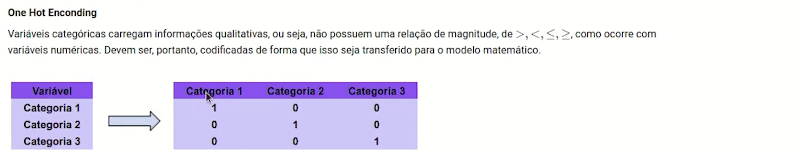

In [50]:
# one hot enconding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(df[['Country']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [51]:
# it's possible use pandas instead
pd.get_dummies(data = df, columns=['Country'])

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,0.769734,0.772568,No,True,False,False
1,-1.699225,-1.408800,Yes,True,False,False
2,-1.263526,-0.863458,No,False,True,False
3,-0.101663,-0.227226,No,False,False,True
4,0.188803,-0.227226,Yes,False,True,False
5,-0.537362,-0.499897,Yes,True,False,False
6,-0.101663,-1.045239,No,False,False,True
7,1.350666,1.408800,Yes,True,False,False
8,1.641132,1.772361,No,False,True,False
9,-0.246896,0.318116,Yes,True,False,False


In [53]:
# label encoding - acept only unidmensional values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])
df

,Country,Age,Salary,Purchased
0,France,0.769734,0.772568,0
1,France,-1.699225,-1.408800,1
2,Germany,-1.263526,-0.863458,0
3,Spain,-0.101663,-0.227226,0
4,Germany,0.188803,-0.227226,1
5,France,-0.537362,-0.499897,1
6,Spain,-0.101663,-1.045239,0
7,France,1.350666,1.408800,1
8,Germany,1.641132,1.772361,0
9,France,-0.246896,0.318116,1
